**Homework - Lecture 2**

---

*Instructions:* Please complete the following exercises and submit your solutions by the next class session.

---

# Maximum Likelihood Estimation (MLE) of Multivariate Normal Distribution

**1. Prove the formulas for the MLE of the mean 
vector and covariance matrix of a multivariate normal distribution.**

**2. Comment on the bias of the MLE estimator for the covariance matrix. How to correct it?**

Please see the uploaded pdf

# Stock Data Analysis

**1. Imports the necessary libraries**

In [1]:
# TODO
import yfinance as yf
import pandas as pd

**2. Using the api [yfinance](https://pypi.org/project/yfinance/) , download the historical daily prices for Apple, JP Morgan, Pfizer, and Exxon Mobil, for the period from January 1, 2020, to December 31, 2025. Save the data in four distinct DataFrames and save the data in a csv file. Describe quickly each dataset.**

In [2]:
# TODO
def download_and_save_stock_data():
    """Download stock data and save to CSV files"""
    
    # Define stock tickers
    stocks = {
        'Apple': 'AAPL',
        'JP_Morgan': 'JPM',
        'Pfizer': 'PFE',
        'Exxon_Mobil': 'XOM'
    }
    
    # Define time range
    start_date = '2020-01-01'
    end_date = '2025-12-31'
    
    print("="*70)
    print("Stock Historical Data Downloader")
    print("="*70)
    print(f"Time Range: {start_date} to {end_date}\n")
    
    # Store all dataframes
    all_dataframes = {}
    
    for company, ticker in stocks.items():
        print(f"\n{'─'*70}")
        print(f"Downloading: {company} ({ticker})")
        print(f"{'─'*70}")
        
        try:
            # Download data
            df = yf.download(ticker, start=start_date, end=end_date, progress=False)
            
            if df.empty:
                print(f"⚠ Warning: No data available for {company}")
                continue
            
            # Save to dictionary
            all_dataframes[company] = df
            
            # Save as CSV file
            filename = f"{ticker}_2020_2025.csv"
            df.to_csv(f"data/{filename}")
            print(f"✓ Data saved to: {filename}")
            
            # Display dataset description
            print(f"\n📊 {company} Dataset Description:")
            print(f"   • Number of records: {len(df):,}")
            print(f"   • Columns: {', '.join([col if isinstance(col, str) else col[0] for col in df.columns])}")
            print(f"   • Start date: {df.index[0].strftime('%Y-%m-%d')}")
            print(f"   • End date: {df.index[-1].strftime('%Y-%m-%d')}")
            
            # Display first 3 rows
            print(f"\n   First 3 rows:")
            print(df.head(3).to_string(max_cols=6))
            
            # Display closing price statistics
            close_col = 'Close' if 'Close' in df.columns else ('Close', ticker)
            print(f"\n   Closing Price Statistics:")
            stats = df[close_col].describe()
            for stat_name, stat_value in stats.items():
                print(f"   • {stat_name:8s}: ${stat_value:,.2f}")
            
        except Exception as e:
            print(f"❌ Error downloading {company} data: {str(e)}")
    
    # Summary
    print(f"\n{'='*70}")
    print("Download Summary")
    print(f"{'='*70}")
    
    if all_dataframes:
        for company, df in all_dataframes.items():
            ticker = stocks[company]
            print(f"✓ {company:15s} ({ticker}): {len(df):,} records → {ticker}_2020_2025.csv")
        print(f"\nTotal: Successfully downloaded {len(all_dataframes)} stocks")
    else:
        print("⚠ No data was successfully downloaded")
    
    print(f"{'='*70}\n")
    
    return all_dataframes

if __name__ == "__main__":   
    dataframes = download_and_save_stock_data()

Stock Historical Data Downloader
Time Range: 2020-01-01 to 2025-12-31


──────────────────────────────────────────────────────────────────────
Downloading: Apple (AAPL)
──────────────────────────────────────────────────────────────────────
✓ Data saved to: AAPL_2020_2025.csv

📊 Apple Dataset Description:
   • Number of records: 1,507
   • Columns: Close, High, Low, Open, Volume
   • Start date: 2020-01-02
   • End date: 2025-12-30

   First 3 rows:
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.468262  72.528582  71.223259  71.476600  135480400
2020-01-03  71.763725  72.523754  71.539337  71.696167  146322800
2020-01-06  72.335548  72.374154  70.634532  70.885464  118387200

   Closing Price Statistics:
❌ Error downloading Apple data: unsupported format string passed to Series.__format__

──────────────────────────────────

**3. For each stock, calculate the daily returns and add them as a 
new column in the respective DataFrame. Plot the returns for each stock using a 2x2 figure.**

Task 3: Calculate Daily Returns and Visualization

✓ Loaded Apple (AAPL) data: 1507 records
  Daily Return Statistics:
    • Mean Return: 0.1081%
    • Std Dev: 2.0044%
    • Min Return: -12.8647%
    • Max Return: 15.3288%
  ✓ Saved to: AAPL_with_returns.csv

✓ Loaded JP Morgan (JPM) data: 1507 records
  Daily Return Statistics:
    • Mean Return: 0.0856%
    • Std Dev: 1.9773%
    • Min Return: -14.9649%
    • Max Return: 18.0125%
  ✓ Saved to: JPM_with_returns.csv

✓ Loaded Pfizer (PFE) data: 1507 records
  Daily Return Statistics:
    • Mean Return: 0.0072%
    • Std Dev: 1.7164%
    • Min Return: -7.7346%
    • Max Return: 10.8552%
  ✓ Saved to: PFE_with_returns.csv

✓ Loaded Exxon Mobil (XOM) data: 1507 records
  Daily Return Statistics:
    • Mean Return: 0.0754%
    • Std Dev: 2.0674%
    • Min Return: -12.2248%
    • Max Return: 12.6868%
  ✓ Saved to: XOM_with_returns.csv

Creating 2x2 Plot of Daily Returns

✓ Plot saved as: daily_returns_2x2_plot.png


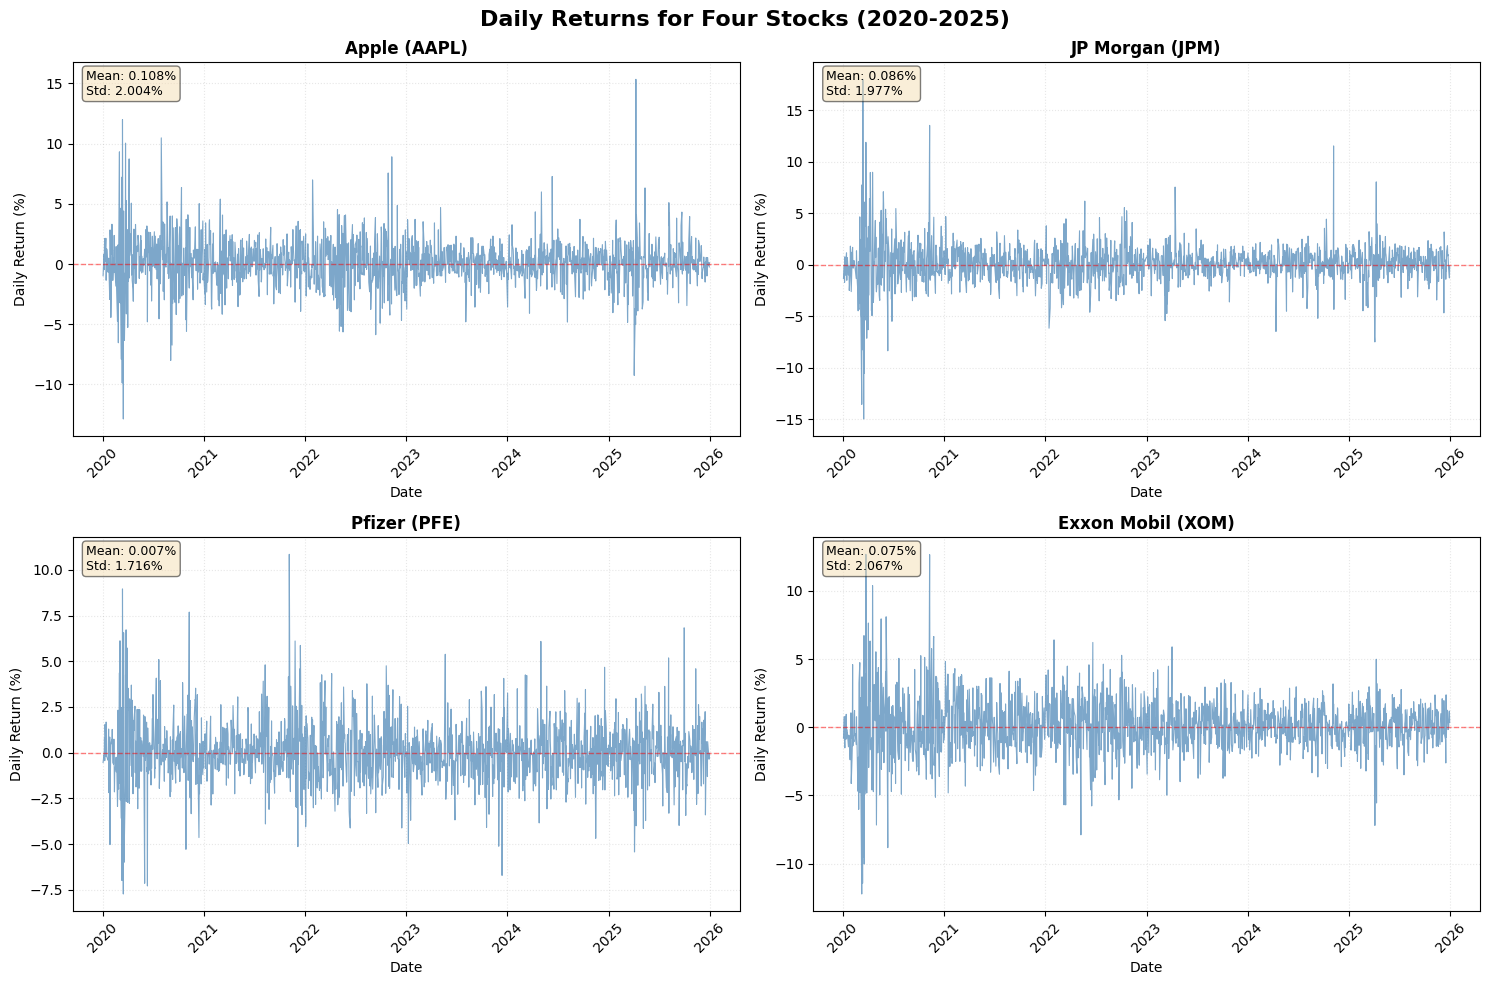


Summary
✓ Calculated daily returns for 4 stocks
✓ Added 'Daily_Return' column to each DataFrame
✓ Saved updated CSV files with '_with_returns' suffix
✓ Created and saved 2x2 visualization



In [3]:
import matplotlib.pyplot as plt

# Define stocks
stocks = {
    'AAPL': 'Apple',
    'JPM': 'JP Morgan',
    'PFE': 'Pfizer',
    'XOM': 'Exxon Mobil'
}

# Dictionary to store dataframes with returns
dataframes = {}

print("="*70)
print("Task 3: Calculate Daily Returns and Visualization")
print("="*70)

# Load data and calculate returns for each stock
for ticker, company in stocks.items():
    filename = f"{ticker}_2020_2025.csv"
    
    try:
        # Load CSV file with MultiIndex columns (header=[0,1])
        df = pd.read_csv(f"data/{filename}", header=[0, 1], index_col=0, parse_dates=True)
        print(f"\n✓ Loaded {company} ({ticker}) data: {len(df)} records")
        
        # Flatten MultiIndex columns - keep only the first level (Price type)
        df.columns = [col[0] for col in df.columns]
        
        # Calculate daily returns using Close price
        # Daily return = (Price_today - Price_yesterday) / Price_yesterday
        df['Daily_Return'] = df['Close'].pct_change()
        
        # Display statistics
        print(f"  Daily Return Statistics:")
        print(f"    • Mean Return: {df['Daily_Return'].mean()*100:.4f}%")
        print(f"    • Std Dev: {df['Daily_Return'].std()*100:.4f}%")
        print(f"    • Min Return: {df['Daily_Return'].min()*100:.4f}%")
        print(f"    • Max Return: {df['Daily_Return'].max()*100:.4f}%")
        
        # Store dataframe
        dataframes[ticker] = df
        
        # Save updated dataframe
        output_filename = f"{ticker}_with_returns.csv"
        df.to_csv(f"data/{output_filename}")
        print(f"  ✓ Saved to: {output_filename}")
        
    except FileNotFoundError:
        print(f"❌ Error: '{filename}' not found. Please download data first.")
    except Exception as e:
        print(f"❌ Error processing {company}: {str(e)}")
        import traceback
        traceback.print_exc()

# Create 2x2 plot
if len(dataframes) == 4:
    print(f"\n{'='*70}")
    print("Creating 2x2 Plot of Daily Returns")
    print(f"{'='*70}\n")
    
    # Create figure with 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Daily Returns for Four Stocks (2020-2025)', 
                 fontsize=16, fontweight='bold')
    
    # Flatten axes array for easier iteration
    axes = axes.flatten()
    
    # Plot each stock
    for idx, (ticker, company) in enumerate(stocks.items()):
        if ticker in dataframes:
            df = dataframes[ticker]
            ax = axes[idx]
            
            # Plot daily returns (convert to percentage)
            ax.plot(df.index, df['Daily_Return'] * 100, 
                   linewidth=0.8, alpha=0.7, color='steelblue')
            
            # Add horizontal line at 0
            ax.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
            
            # Formatting
            ax.set_title(f'{company} ({ticker})', fontsize=12, fontweight='bold')
            ax.set_xlabel('Date', fontsize=10)
            ax.set_ylabel('Daily Return (%)', fontsize=10)
            ax.grid(True, alpha=0.3, linestyle=':')
            
            # Add statistics text box
            mean_return = df['Daily_Return'].mean() * 100
            std_return = df['Daily_Return'].std() * 100
            ax.text(0.02, 0.98, f'Mean: {mean_return:.3f}%\nStd: {std_return:.3f}%', 
                   transform=ax.transAxes, fontsize=9, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
            
            # Rotate x-axis labels
            ax.tick_params(axis='x', rotation=45)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save plot
    output_plot = 'daily_returns_2x2_plot.png'
    plt.savefig(f"figures/{output_plot}", dpi=300, bbox_inches='tight')
    print(f"✓ Plot saved as: {output_plot}")
    
    # Display plot
    plt.show()
    
    print(f"\n{'='*70}")
    print("Summary")
    print(f"{'='*70}")
    print(f"✓ Calculated daily returns for {len(dataframes)} stocks")
    print(f"✓ Added 'Daily_Return' column to each DataFrame")
    print(f"✓ Saved updated CSV files with '_with_returns' suffix")
    print(f"✓ Created and saved 2x2 visualization")
    print(f"{'='*70}\n")
    
else:
    print(f"\n⚠ Warning: Expected 4 stocks, but only found {len(dataframes)}.")
    print("Please ensure all stock data files are available.")

4. **Calculate and plot the cumulative returns for each stock over the entire period. Which stock had the highest cumulative return?**

Task 4: Cumulative Returns Analysis

Apple (AAPL):
  Final Cumulative Return: 276.83%

JP Morgan (JPM):
  Final Cumulative Return: 170.48%

Pfizer (PFE):
  Final Cumulative Return: -10.61%

Exxon Mobil (XOM):
  Final Cumulative Return: 125.47%

🏆 Highest Cumulative Return: Apple (AAPL)
   Return: 276.83%

✓ Plot saved as: cumulative_returns_plot.png


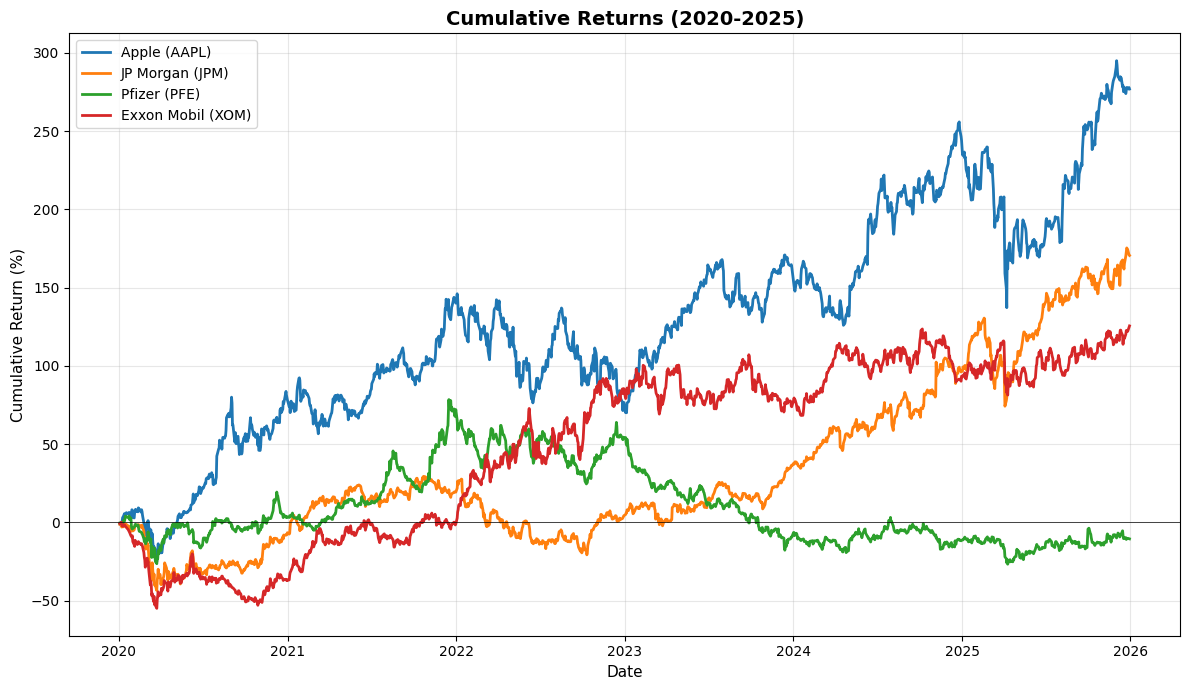

In [4]:
# TODO

# Dictionary to store dataframes
dataframes = {}
cumulative_returns = {}

print("="*70)
print("Task 4: Cumulative Returns Analysis")
print("="*70)

# Load data and calculate cumulative returns
for ticker, company in stocks.items():
    filename = f"{ticker}_with_returns.csv"
    
    try:
        # Load data
        df = pd.read_csv(f"data/{filename}", index_col=0, parse_dates=True)
        
        # Calculate cumulative return: (1 + daily_return).cumprod() - 1
        df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod() - 1
        
        # Store
        dataframes[ticker] = df
        final_return = df['Cumulative_Return'].iloc[-1]
        cumulative_returns[ticker] = final_return
        
        print(f"\n{company} ({ticker}):")
        print(f"  Final Cumulative Return: {final_return*100:.2f}%")
        
    except Exception as e:
        print(f"❌ Error loading {company}: {str(e)}")

# Find the best performer
if cumulative_returns:
    best_ticker = max(cumulative_returns, key=cumulative_returns.get)
    best_company = stocks[best_ticker]
    best_return = cumulative_returns[best_ticker]
    
    print(f"\n{'='*70}")
    print(f"🏆 Highest Cumulative Return: {best_company} ({best_ticker})")
    print(f"   Return: {best_return*100:.2f}%")
    print(f"{'='*70}")

# Plot cumulative returns
if len(dataframes) == 4:
    plt.figure(figsize=(12, 7))
    
    for ticker, company in stocks.items():
        if ticker in dataframes:
            df = dataframes[ticker]
            plt.plot(df.index, df['Cumulative_Return'] * 100, 
                    label=f'{company} ({ticker})', linewidth=2)
    
    plt.title('Cumulative Returns (2020-2025)', fontsize=14, fontweight='bold')
    plt.xlabel('Date', fontsize=11)
    plt.ylabel('Cumulative Return (%)', fontsize=11)
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    
    plt.tight_layout()
    plt.savefig('figures/cumulative_returns_plot.png', dpi=300, bbox_inches='tight')
    print(f"\n✓ Plot saved as: cumulative_returns_plot.png")
    plt.show()

**5. For each stock, calculate the rolling moving averages of the daily closing prices using a time window of 30, 60, and 90 days and plot them.**

Task 5: Calculate and Plot Rolling Moving Averages (30, 60, 90 Days)

Processing Moving Averages for Apple (AAPL)...
  ✓ Created 30-day Moving Average
  ✓ Created 60-day Moving Average
  ✓ Created 90-day Moving Average
  ✓ Trend plot saved as: figures/AAPL_moving_averages.png


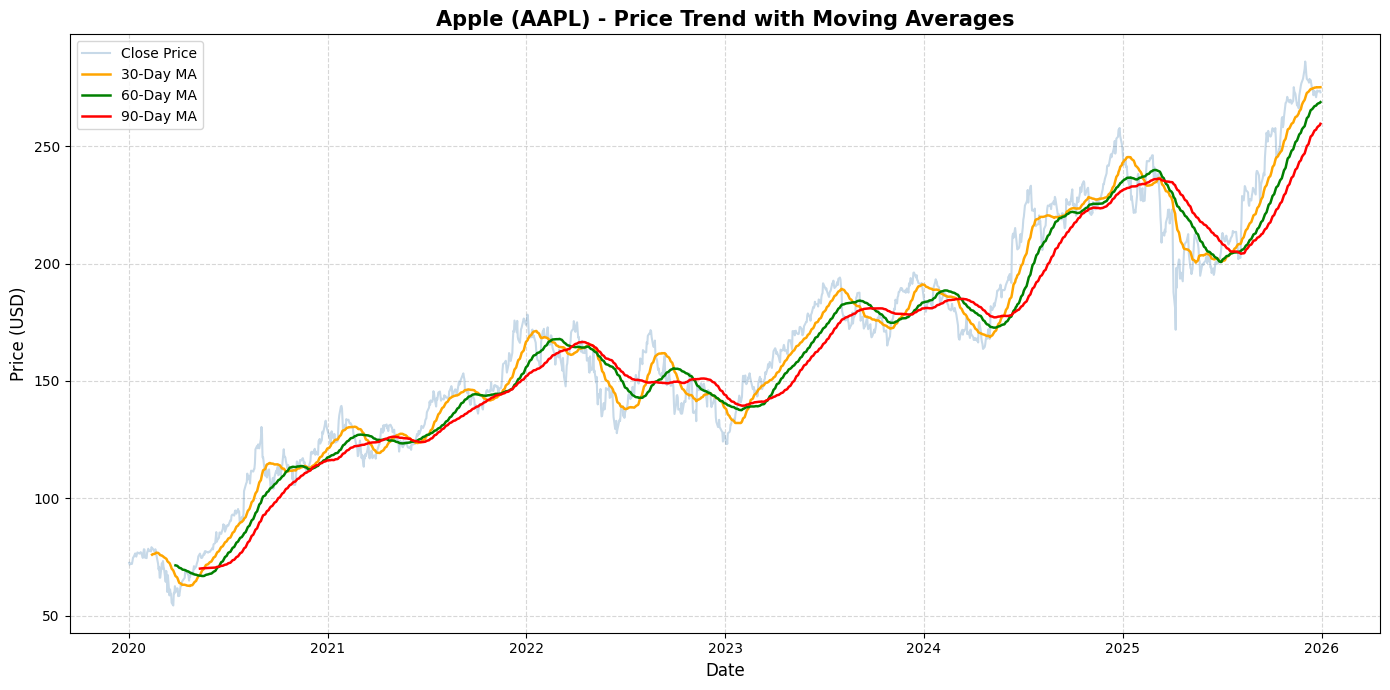


Processing Moving Averages for JP Morgan (JPM)...
  ✓ Created 30-day Moving Average
  ✓ Created 60-day Moving Average
  ✓ Created 90-day Moving Average
  ✓ Trend plot saved as: figures/JPM_moving_averages.png


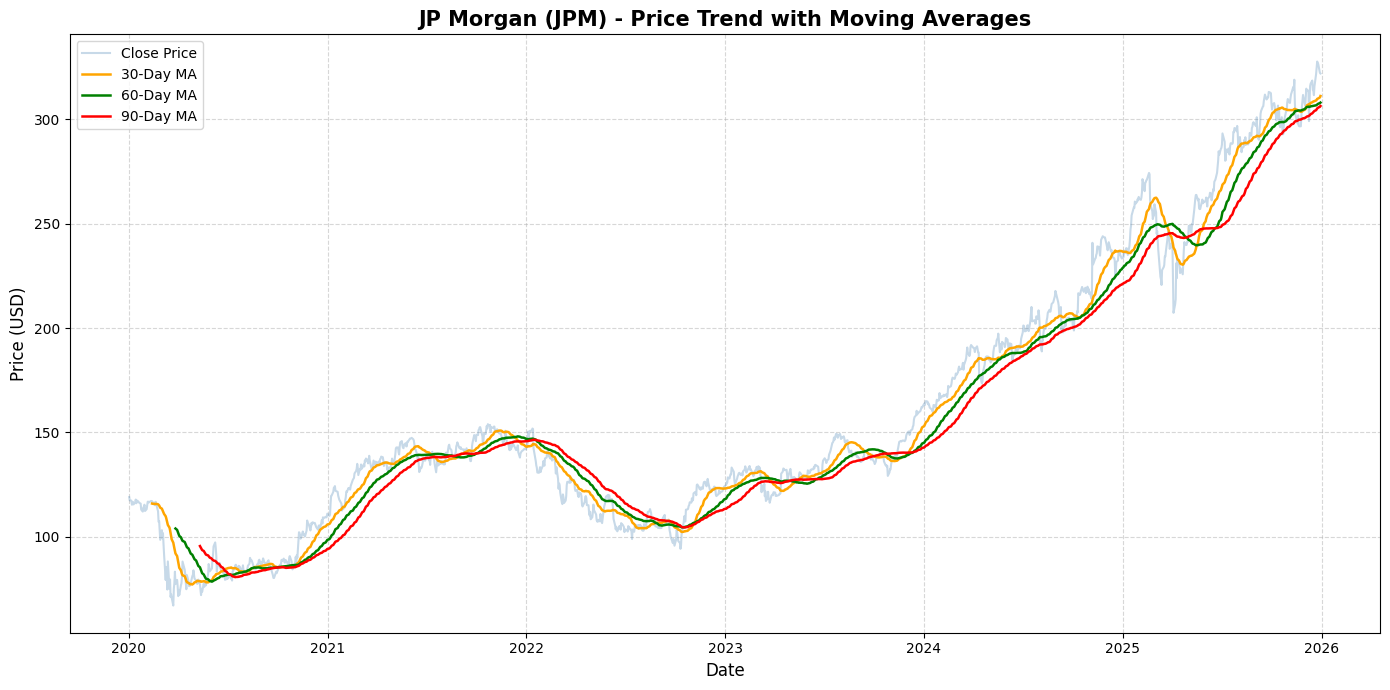


Processing Moving Averages for Pfizer (PFE)...
  ✓ Created 30-day Moving Average
  ✓ Created 60-day Moving Average
  ✓ Created 90-day Moving Average
  ✓ Trend plot saved as: figures/PFE_moving_averages.png


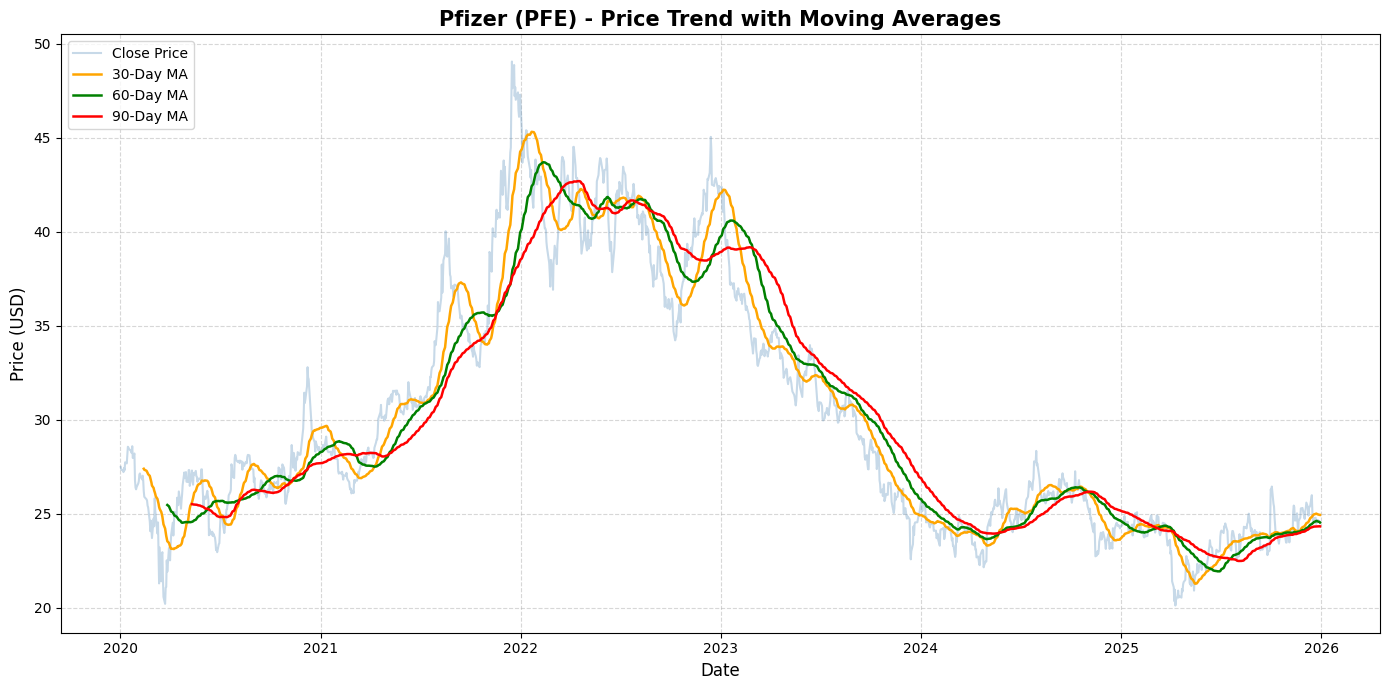


Processing Moving Averages for Exxon Mobil (XOM)...
  ✓ Created 30-day Moving Average
  ✓ Created 60-day Moving Average
  ✓ Created 90-day Moving Average
  ✓ Trend plot saved as: figures/XOM_moving_averages.png


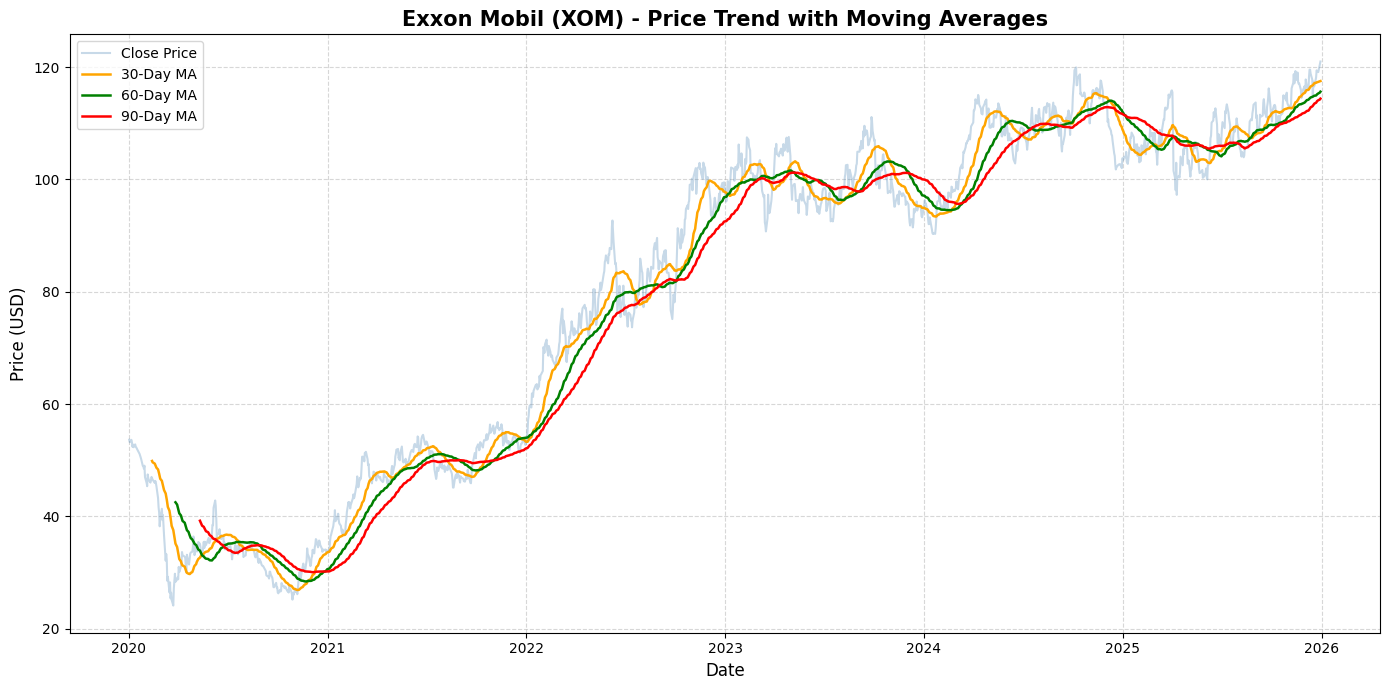


Task 5 Summary
✓ Calculated 30, 60, and 90-day moving averages for 4 stocks
✓ Added MA columns to each DataFrame
✓ Generated and saved individual trend comparison plots



In [5]:
# TODO
print("="*70)
print("Task 5: Calculate and Plot Rolling Moving Averages (30, 60, 90 Days)")
print("="*70)

# Define window sizes and corresponding colors for the plot
windows = [30, 60, 90]
colors = {30: 'orange', 60: 'green', 90: 'red'}

for ticker, company in stocks.items():
    if ticker in dataframes:
        df = dataframes[ticker]
        print(f"\nProcessing Moving Averages for {company} ({ticker})...")
        
        # 1. Calculate Rolling Moving Averages
        # We use .rolling() to create a window and .mean() to calculate the average
        for window in windows:
            column_name = f'MA_{window}'
            df[column_name] = df['Close'].rolling(window=window).mean()
            print(f"  ✓ Created {window}-day Moving Average")

        # 2. Visualization
        plt.figure(figsize=(14, 7))
        
        # Plot the original Closing Price with lower opacity (alpha) to highlight MAs
        plt.plot(df.index, df['Close'], label='Close Price', 
                 color='steelblue', alpha=0.3, linewidth=1.5)
        
        # Plot each Moving Average line
        for window in windows:
            plt.plot(df.index, df[f'MA_{window}'], 
                     label=f'{window}-Day MA', 
                     color=colors[window], 
                     linewidth=1.8)
        
        # Chart Formatting
        plt.title(f'{company} ({ticker}) - Price Trend with Moving Averages', 
                  fontsize=15, fontweight='bold')
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Price (USD)', fontsize=12)
        plt.legend(loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.5)
        
        # Adjust layout to prevent clipping
        plt.tight_layout()
        
        # Save the plot as a PNG file
        output_plot = f"figures/{ticker}_moving_averages.png"
        plt.savefig(output_plot, dpi=300)
        print(f"  ✓ Trend plot saved as: {output_plot}")
        
        # Display the plot
        plt.show()

# Final Summary for Task 5
print(f"\n{'='*70}")
print("Task 5 Summary")
print(f"{'='*70}")
print(f"✓ Calculated 30, 60, and 90-day moving averages for {len(dataframes)} stocks")
print(f"✓ Added MA columns to each DataFrame")
print(f"✓ Generated and saved individual trend comparison plots")
print(f"{'='*70}\n")